In [25]:
import pandas as pd
import re
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import wandb


In [2]:
data_path = "SoftwareEngineer_cleaned.csv"
df = pd.read_csv(data_path)
print(df.shape)
df.head()

(34012, 12)


,title,level,company,yearsofexperience,totalyearlycompensation,gender,Doctorate_Degree,Masters_Degree,Bachelors_Degree,tag,state,city
0,Software Engineer,SE 2,eBay,5.0,100000,NaN,0,0,0,NaN,CA,San Francisco
1,Software Engineer,60,Microsoft,5.0,157000,NaN,0,0,0,NaN,CA,Mountain View
2,Software Engineer,63,Microsoft,8.5,208000,NaN,0,0,0,NaN,WA,Seattle
3,Software Engineer,62,Microsoft,4.0,156000,NaN,0,0,0,NaN,WA,Seattle
4,Software Engineer,59,Microsoft,3.0,120000,NaN,0,0,0,NaN,WA,Redmond


In [3]:
headers1 = ["company", "yearsofexperience", "Doctorate_Degree", "Masters_Degree", "Bachelors_Degree", "state", "city", "tag", "gender", 'level', "totalyearlycompensation"]
cat = ["company", "state", "city", "tag", "gender", 'level']
df_clean = df[headers1]
df_clean

,company,yearsofexperience,Doctorate_Degree,Masters_Degree,Bachelors_Degree,state,city,tag,gender,level,totalyearlycompensation
0,eBay,5.0,0,0,0,CA,San Francisco,NaN,NaN,SE 2,100000
1,Microsoft,5.0,0,0,0,CA,Mountain View,NaN,NaN,60,157000
2,Microsoft,8.5,0,0,0,WA,Seattle,NaN,NaN,63,208000
3,Microsoft,4.0,0,0,0,WA,Seattle,NaN,NaN,62,156000
4,Microsoft,3.0,0,0,0,WA,Redmond,NaN,NaN,59,120000
...,...,...,...,...,...,...,...,...,...,...,...
34007,Google,10.0,0,0,0,WA,Seattle,Distributed Systems (Back-End),NaN,T4,327000
34008,Microsoft,2.0,0,0,0,WA,Redmond,Full Stack,NaN,62,237000
34009,MSFT,14.0,0,0,0,WA,Seattle,Full Stack,NaN,63,220000
34010,Salesforce,8.0,0,0,0,CA,San Francisco,iOS,NaN,Lead MTS,280000


In [4]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df_clean[cat]), index=df_clean.index)

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(cat)
encode_df.head()

C:\Users\pedia\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,company_10x Genomics,company_23andMe,company_2U,company_3M,company_3m,company_7-Eleven,company_7-eleven,company_8x8,company_ABB,company_ADP,...,level_unknown,level_vice president,level_x2,level_x4,level_x5,level_x6,level_x7,level_z4,level_||,level_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_clean = df_clean.merge(encode_df,left_index=True, right_index=True)
df_clean = df_clean.drop(cat,1)
df_clean# Merge one-hot encoded features and drop the originals
df_clean

C:\Users\pedia\AppData\Local\Temp\ipykernel_29520\1232695819.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_clean = df_clean.drop(cat,1)


,yearsofexperience,Doctorate_Degree,Masters_Degree,Bachelors_Degree,totalyearlycompensation,company_10x Genomics,company_23andMe,company_2U,company_3M,company_3m,...,level_unknown,level_vice president,level_x2,level_x4,level_x5,level_x6,level_x7,level_z4,level_||,level_nan
0,5.0,0,0,0,100000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,0,0,0,157000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.5,0,0,0,208000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0,0,0,156000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0,0,0,120000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34007,10.0,0,0,0,327000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34008,2.0,0,0,0,237000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34009,14.0,0,0,0,220000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34010,8.0,0,0,0,280000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Split our preprocessed data into our features and target arrays
y = df_clean.totalyearlycompensation
X = df_clean.drop(columns=["totalyearlycompensation"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, train_size=0.8)

In [16]:
X_train = torch.from_numpy(X_train.values).float()
y_train = torch.from_numpy(y_train.values).float()
X_test = torch.from_numpy(X_test.values).float()
y_test = torch.from_numpy(y_test.values).float()

In [44]:
wandb.init(project="Random Forest Regressor-MLDLVC")
# create regressor object
regressor = RandomForestRegressor(n_estimators = 200, random_state = 42)

 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

Y_pred = regressor.predict(X_test)  # test the output by changing values

R-squared,▁▁
R-squared,0.61283


In [45]:
pred = pd.DataFrame({"Prediction": Y_pred, "Actual": y_test})
pred.reset_index(drop=True, inplace=True)
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(pred)

         Prediction    Actual
0     274976.506494  270000.0
1     384517.583333  395000.0
2     219806.583333  227000.0
3     172553.333333  250000.0
4     168525.000000  175000.0
5     151291.666667  130000.0
6     167769.013889  172000.0
7     199460.000000  190000.0
8     148560.065476  201000.0
9     406445.000000  439000.0
10    174131.000000  135000.0
11    524515.000000  382000.0
12    163414.952381  164000.0
13    308266.053571  280000.0
14    162416.000000  174000.0
15    286010.000000  280000.0
16    185967.500000  179000.0
17    272979.166667  237000.0
18     83310.000000   85000.0
19    283916.067349  291000.0
20    258318.888889  259000.0
21    158090.833333  165000.0
22    191435.000000  200000.0
23    315230.750000  320000.0
24    283485.833333  300000.0
25    227621.666667  215000.0
26    298587.111111  544000.0
27    280824.666667  217000.0
28    294545.000000  240000.0
29    263193.500000  430000.0
30    140600.000000  106000.0
31    167052.418110  176000.0
32    2293

In [46]:
training_score = regressor.score(X_train, y_train)
testing_score = regressor.score(X_test, y_test)
mse = mean_absolute_percentage_error(y_test, Y_pred)
rmse = mse**.5
print(mse)
#print(rmse)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

0.1596561511872167
Training Score: 0.9547991266576409
Testing Score: 0.731508546405423


R² score tells us how well our model is fitted to the data by comparing it to the average line of the dependent variable. If the score is closer to 1, then it indicates that our model performs well versus if the score is farther from 1, then it indicates that our model does not perform so well.

In [47]:
r2 = r2_score(Y_pred, y_test)
print("R-squared score: ", r2)

R-squared score:  0.6148875157527467


In [48]:
wandb.log({"R-squared": r2})
wandb.config.update({"n_estimators": 200,  "random_state": 42})

# Why Don’t  Need to Normalize Data for the Random Forest Algorithm?

The process of scaling data through normalization is to ensure that a specific feature is not prioritized over another. This technique is particularly important in algorithms that are distance-based, such as K nearest Neighbors and K-means as it requires Euclidean Distance.

However, the Random Forest algorithm is not a distance-based model - it is a tree-based model.

## Finally i achieve R2 Score 61.4%

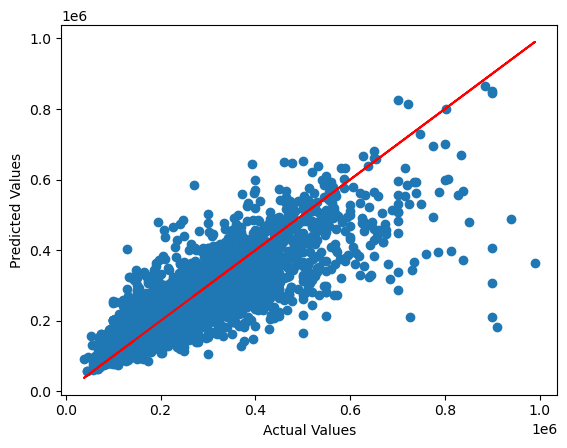

In [53]:
import matplotlib.pyplot as plt

plt.scatter(y_test, Y_pred)

# Add a line of best fit
plt.plot(y_test, y_test, color = 'red')

# Add axis labels
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Show the plot
plt.show()